In [1]:
from astroquery.mast import Catalogs
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive

In [2]:
TIC = 'TIC 55525572'
available_data_all = lk.search_lightcurve(TIC, author='SPOC')[0:9]
available_data_all

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 04,2018,SPOC,120,55525572,0.0
1,TESS Sector 05,2018,SPOC,120,55525572,0.0
2,TESS Sector 06,2018,SPOC,120,55525572,0.0
3,TESS Sector 08,2019,SPOC,120,55525572,0.0
4,TESS Sector 09,2019,SPOC,120,55525572,0.0
5,TESS Sector 10,2019,SPOC,120,55525572,0.0
6,TESS Sector 11,2019,SPOC,120,55525572,0.0
7,TESS Sector 12,2019,SPOC,120,55525572,0.0
8,TESS Sector 13,2019,SPOC,120,55525572,0.0


Stitched light curve contains valid data.


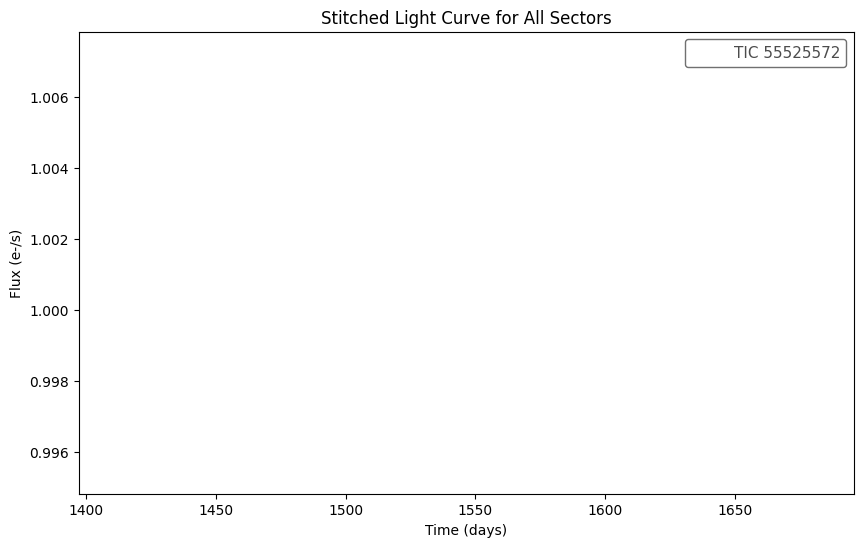

In [3]:
lc_collection = available_data_all.download_all().stitch()
if lc_collection and lc_collection.flux is not None:
    print("Stitched light curve contains valid data.")
    
    # Plot the stitched light curve
    fig, ax = plt.subplots(figsize=(10, 6))
    lc_collection.plot(ax=ax, linewidth=0, color='purple', markersize=1)
    ax.set_title("Stitched Light Curve for All Sectors")
    ax.set_xlabel("Time (days)")
    ax.set_ylabel("Flux (e-/s)")
    plt.show()
else:
    print("The stitched light curve does not contain valid data.")
# fig, ax = plt.subplots(figsize=(8, 4))
# lc_collection.plot(ax=ax, linewidth = 0, color = 'purple', markersize=1)

In [4]:
for lc in available_data_all.download_all():
    print(lc)
    print(lc.flux)  # Check if flux values exist

       time             flux      ...   pos_corr1      pos_corr2   
                    electron / s  ...      pix            pix      
------------------ -------------- ... -------------- --------------
 1410.903585553591  1.8506389e+04 ...  1.4365412e-01 -4.9757697e-02
1410.9049744438926  1.8484715e+04 ...  1.4212939e-01 -4.8629139e-02
 1410.906363334136  1.8487074e+04 ...  1.4083026e-01 -5.2741684e-02
1410.9077522244368  1.8526572e+04 ...  1.3947593e-01 -5.0220061e-02
1410.9091411147376  1.8470102e+04 ...  1.3797523e-01 -5.2745976e-02
1410.9105300050392  1.8482939e+04 ...  1.3706176e-01 -5.8229309e-02
1410.9119188953407  1.8510209e+04 ...  1.3715290e-01 -4.9638275e-02
1410.9133077856416  1.8494400e+04 ...  1.3988826e-01 -5.3136531e-02
 1410.914696675943  1.8493137e+04 ...  1.3770239e-01 -5.7661433e-02
               ...            ... ...            ...            ...
1436.8382185902144            ——— ...  2.6119148e-02  8.6320274e-02
1436.8396074645739            ——— ...  2.3982292

In [5]:
lc_collection = available_data_all.download_all().stitch()
print(lc_collection)  # Check the light curve object
print(lc_collection.time)  # Ensure time data exists
print(lc_collection.flux)  # Ensure flux data exists

       time             flux      ...   pos_corr1      pos_corr2   
                                  ...      pix            pix      
------------------ -------------- ... -------------- --------------
 1410.903585553591  1.0011282e+00 ...  1.4365412e-01 -4.9757697e-02
1410.9049744438926  9.9995571e-01 ...  1.4212939e-01 -4.8629139e-02
 1410.906363334136  1.0000833e+00 ...  1.4083026e-01 -5.2741684e-02
1410.9077522244368  1.0022200e+00 ...  1.3947593e-01 -5.0220061e-02
1410.9091411147376  9.9916518e-01 ...  1.3797523e-01 -5.2745976e-02
1410.9105300050392  9.9985969e-01 ...  1.3706176e-01 -5.8229309e-02
1410.9119188953407  1.0013349e+00 ...  1.3715290e-01 -4.9638275e-02
1410.9133077856416  1.0004797e+00 ...  1.3988826e-01 -5.3136531e-02
 1410.914696675943  1.0004113e+00 ...  1.3770239e-01 -5.7661433e-02
               ...            ... ...            ...            ...
1682.3441298321598  9.9827909e-01 ... -1.4637209e-02 -5.2770041e-02
1682.3455187401162  1.0002061e+00 ... -1.1171774